In [10]:
import qmcpy as qp
import numpy as np
import random
import math
import time
import matplotlib.pyplot as plt
import scipy

print('okay')

okay


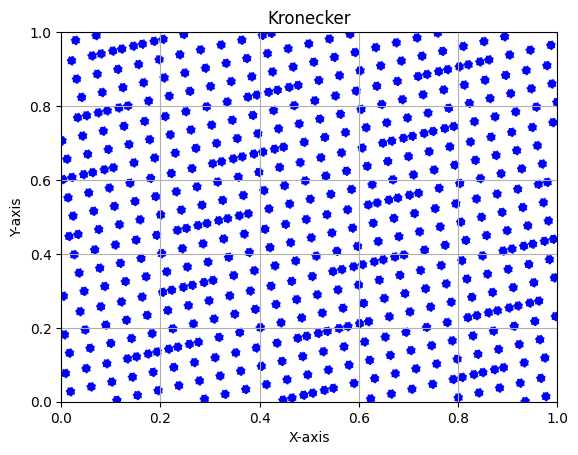

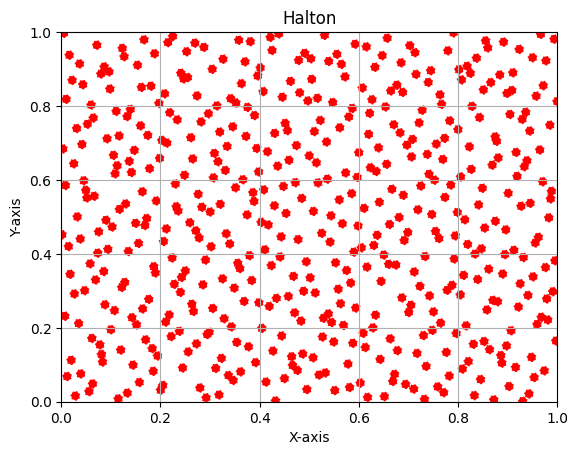

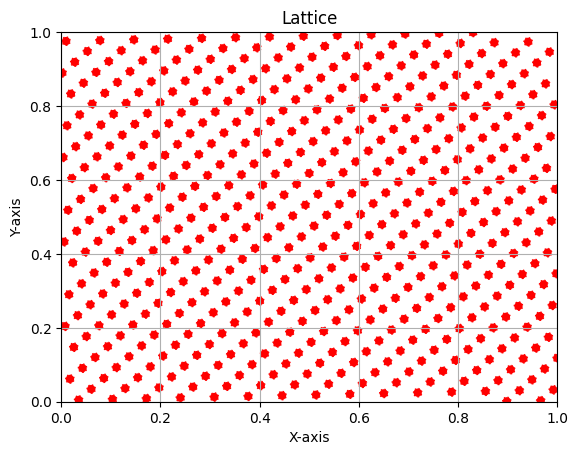

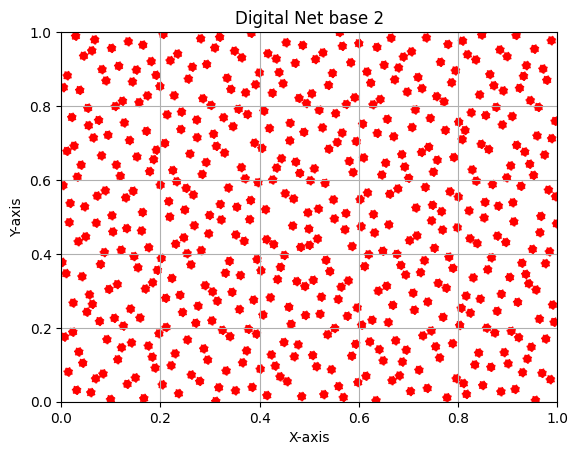

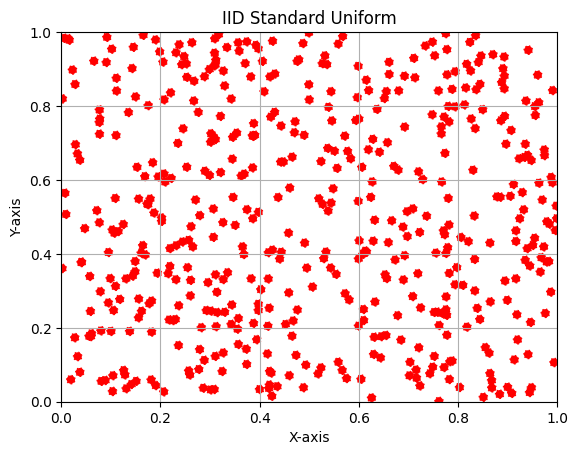

In [9]:
X = qp.kronecker(512, 2, alpha = [np.sqrt(2), np.sqrt(5)])
x = X[:,0]
y = X[:,1]

halton = qp.Halton(2)
H = halton.gen_samples(512)

lattice = qp.Lattice(2)
L = lattice.gen_samples(512)

dnb2 = qp.DigitalNetB2(2)
d2 = dnb2.gen_samples(512)

dd = qp.IIDStdUniform(2)
iid = dd.gen_samples(512)

# Create a line plot
plt.scatter(x, y, color='blue', linestyle='dotted')
plt.title('Kronecker')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis((0, 1, 0, 1))
plt.grid(True)
plt.show()

plt.scatter(H[:,0], H[:, 1], color='red', linestyle='dotted')
plt.title('Halton')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis((0, 1, 0, 1))
plt.grid(True)
plt.show()

plt.scatter(L[:,0], L[:, 1], color='red', linestyle='dotted')
plt.title('Lattice')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis((0, 1, 0, 1))
plt.grid(True)
plt.show()

plt.scatter(d2[:,0], d2[:, 1], color='red', linestyle='dotted')
plt.title('Digital Net base 2')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis((0, 1, 0, 1))
plt.grid(True)
plt.show()

plt.scatter(iid[:,0], iid[:, 1], color='red', linestyle='dotted')
plt.title('IID Standard Uniform')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis((0, 1, 0, 1))
plt.grid(True)
plt.show()

In [ ]:
%% Play with Kronecker points
%% alpha = [0.264261604544122   0.613508092488290]
close all
clearvars
%% set up parameters
n = 1000;  %maximum number of samples
%alphamat = [sqrt(2) sqrt(3); sqrt(2) sqrt(5); sqrt(2) sqrt(7)]';
n_al = 5000;  %number of random samples of alpha
discwt =  @(n) (1:n)';  %all values of n count 
%discwt = @(n) [zeros(n-1,1); 1];  %only the last value of n counts
coordwts = [1,1];

%% Experiment in 1 dimension
alphamat = reshape(rand(1,n_al),1,1,n_al);
[wssd,~] = wtdsumsqdisckron(n,alphamat,discwt,coordwts);
[wssdmin,wh_al] = min(wssd);
alphabest = alphamat(1,1,wh_al);
figure
semilogy(squeeze(alphamat),wssd,'.',MarkerSize=10)
hold on
semilogy(alphabest,wssdmin,'.')
xlabel("$\alpha$")
ylabel("Weighted Sum of Squared Discrepancies")
title(['$\alpha = ($' num2str(alphabest) '), WSSD = ' num2str(wssdmin)])

%% Experiment in d dimensions
alphamat = reshape(rand(2,n_al),1,2,n_al);
[wssd,xkron] = wtdsumsqdisckron(n,alphamat,discwt,coordwts);
[wssdmin,wh_al] = min(wssd);
alphabest = alphamat(1,:,wh_al);
figure
plot(xkron(:,1,wh_al),xkron(:,2,wh_al),'.',markersize = 10)
xlabel("$x_1$")
ylabel("$x_2$")
title(['$\alpha = ($' num2str(alphabest) '), WSSD = ' num2str(wssdmin)])


In [82]:
def wtdsumsqdisckron(n,alphamat, discwt,coordwts):
    [d, n_al] = A.shape[1:3]
    coordwts = coordwts[:d]
    
    xkron = kronPts(n,alphamat)
    discwtvec = discwt
    beta = np.sum(discwtvec)
    bhat = discwtvec/((np.arange(1,n+1).reshape((n+1,1)))^2)
    bhat = np.flip(bhat)
    btilde = np.cumsum(bhat)
    b = np.cumsum(bhat + btilde[2:n,:])
    bern_poly_kern = (1 + 0.5*coordwts[1:d]*(xkron*(xkron-1) + 1/6))
    print(type(bern_poly_kern))
    intk = 1
    kernelkron = np.prod(bern_poly_kern)  %Bernoulli polynomial kernel
    wssd = - beta*intk*ones(1,n_al);
    wssd = wssd + b(1)*kernelkron(1,:) + 2*sum(b(2:n).*kernelkron(2:n,:));

def KronPts(n, alphamat, n_batch = 1000):
    xpts = np.zeros((n, d, n_al))
    n_start = 1
    nn = min(n-n_start,n_batch)
    n_end = n_start+nn
    xpts[2:n_end,:,:] = ((np.arange(1,nn+1).reshape((n+1,1)))*alphamat) % 1
    n_start = n_end
    first_batch = True
    while n_start < n:
        nn = min(n-n_start,n_batch)
        n_end = n_start+nn
        if first_batch:
            xpts[2:n_end,:,:] = ((np.arange(1,nn+1).reshape((n+1,1)))*alphamat) % 1
            first_batch = False
        else:
            xpts[n_start+1:n_end,:,:] = (xpts[2:nn+1,:,:]+xpts[n_start,:,:]) % 1
        end
        n_start = n_end;
    

alpha = np.array([0.264261604544122, 0.613508092488290])
n_al = 5000
alphamat = (np.array([[np.sqrt(2), np.sqrt(3)], [np.sqrt(2), np.sqrt(5)], [np.sqrt(2), np.sqrt(7)]])).T
n = 1000
n_al = 5000
discwt = np.arange(1,n+1).reshape((n, 1))
discwt = np.zeros((n,1))
discwt[n-1] = 1
coordwts = np.array([1, 1])



SyntaxError: invalid syntax (3195487788.py, line 15)

In [42]:
n_batch = 1000
n_start = 1
nn = min(n-n_start,n_batch)
n_end = n_start+nn
alphamat = np.random.rand(1,n_al).reshape((1,1,n_al))
xpts[2:n_end,:,:] = (np.arange(1: nn).reshape((n,1))).T*alphamat % 1
print(xpts)

ValueError: cannot reshape array of size 998 into shape (1000,1)

In [43]:
np.arange(4).reshape((4, 1))

array([[0],
       [1],
       [2],
       [3]])

In [53]:
d=2
xpts = np.zeros((n, d, n_al))
n_start = 1
nn = min(n-n_start,n_batch)
n_end = n_start+nn
xpts = np.zeros((n, d, n_al))
n_start = 1
nn = min(n-n_start,n_batch)
n_end = n_start+nn
print(np.arange(1:nn).reshape((n,1)))


SyntaxError: invalid syntax (990641273.py, line 10)

In [81]:
B = np.arange(1,4)
print(type(B))

<class 'numpy.ndarray'>


In [2]:
halton = qp.Halton(2,randomize="LMS_PERM",seed=7)
H = halton.gen_samples(1000)
kronecker = qp.kronecker(1000, 2, alpha = np.array([np.sqrt(2), np.sqrt(3)]))
print(qp.discrepancy(H, 'l2', weight = 1, limiter = 2**25, Time = False))
print(qp.discrepancy(kronecker, 'l2', weight = 1, limiter = 2**25, Time = False))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [2]:
def discrepancy(x, method, weight = 1, limiter = 2**25, Time = False):
    """
    Args:
    x (nparray): An n by d matrix containing samples from x_1 to x_n with 'd' dimensions

    method (string or list of functions):
    If method is a string, then user can use these for a list of discrepancies this function can calculate:
    * Star discrepancy: "l2", "l2star", "s", or "star"
    * Centered discrepancy: "c", "centered", or "cd" 
    * Symmetric discrepancy: "sy" or "symmetric"
    * Wrap Around discrepancy: "wa", "wrap around", "wrap-around", or "wd"
    * Mixture discrepancy: "m", "mixture" or "md"
    * Unanchored discrepancy: "un" or "unanchored"
    * Warnock discrepancy: "warnock" or "wk" (Note, cannot be weighted, it will be in the future)

    If method is a list of functions, the user can give a list of 2 or 3 functions. Depending on which,
    if method is a list of 3 functions, it will assign the 1st, 2nd, and 3rd function as the double
    integral, single integral, and kernel respectively. However, if method is a list of 2 functions, 
    then the 1st and 2nd function would be its double integral, and kernel respectively, and the single
    intgeral would be kept at 0.

    The double integral function must have 1 parameter being its weight.
    The single integral function must have 2 parameters being x (sample point) and its weight, respectively.
    The kernel function must have 3 parameters being x and y (both being sample points) and its weight, respectively.

    weight (nparray): A 1 by 'd' dimensional nparray such that it contains weights. If the user does not assign weight,
    it will assume that the weight is 1 (unweighted).

    limiter (int): the limiter variable is an integer that limits its workload for calculation, that way the
    discrepancy function does not get overwhelmed when doing it's calculations.

    Time (boolean): If Time is False, the discrepancy function won't give out the time it took to calculate.
    As it is assumed in the discrepancy function. As for when Time is True, the function will output the time
    it took to calculate the discrepancy.

    Returns:
    if Time is False:
    discrepancy (float)

    if Time is True:
    discrepancy (float), time (float)

    Note:
    For this function to give out an output, you need "x" (list of sample points) and "method" (desired discrepancy)

    """
    
    if Time == True:                #Times the actual calculation for discrepancy
        start_time = time.time()

    n, d = x.shape  #Finds the number of samples and their dimensions

    #reconfigures the weight so that it is appropriate to the given matrix
    if type(weight) == list: # if weight is a list
        weight = weight[0:d] #make sure you take the first d elements for calculations
    else:
        weight = weight * np.ones(d) #if weight is scalar, just make a list of d weights.

    if type(method) == str:    #If a method was chosen
        if type(method) is str: #Give the double and single integral along with the kernel based on the method
            if method.lower() == "l2" or method.lower() == "l2star" or method.lower() == "s" or method.lower() == "star":           #Star
                double_integral = lambda w : (1 + (w/3)).prod(axis=0)
                single_integral = lambda x, w : ((1 + (w*(1 - x**2)/2))).prod(axis=1)
                kernel = lambda x, y, w : (1 + w*(1 - np.maximum(x, y))).prod(axis=2)
            #elif method.lower() == "s" or method.lower() == "star":        #L2star
            #    double_integral = lambda d: (1/3)**d
            #    single_integral = lambda x, w : ((1-x**2)/2).prod(axis=1)
            #    kernel = lambda x, y, w : (1 - np.maximum(x, y)).prod(axis=2)
            elif method.lower() == "c" or method.lower() == "centered" or method.lower() == 'cd':         #Centered
                double_integral = lambda w : (1 + (w/12)).prod()
                single_integral = lambda x, w : (1 + (0.5*w)*(abs(x - .5)*(1 - abs(x -.5)))).prod(axis=1)
                kernel = lambda x, y, w : (1 + (0.5*w)*(abs(x - .5) + abs(y - .5) - abs(x - y))).prod(axis=2)
            elif method.lower() == "sy" or method.lower() == "symmetric":        #Symmetric
                double_integral = lambda w : (1 +(w/3)).prod(axis=0)
                single_integral = lambda x, w: (1 + (w*2*x) - (w*2*(x**2))).prod(axis=1)
                kernel = lambda x, y, w : (1 + w*(1 - abs(x - y))).prod(axis=2)
            elif method.lower() == "wa" or method.lower() == "wrap around" or method.lower() == "wrap-around" or method.lower() == 'wd':        #Wrap around
                double_integral = lambda w : -(1 + (w/3)).prod(axis=0)
                single_integral = 0
                kernel = lambda x, y, w: (1 + w*(.5 - (abs(x - y)*(1 - abs(x - y))))).prod(axis=2)
            elif method.lower() == "m" or method.lower() == "mixture" or method.lower() == 'md':        #Wrap around
                double_integral = lambda w: (((7/12)*w)+1).prod()
                single_integral = lambda x, w: (1 + w*((2/3) - (.25*abs(x - .5)) - (.25*((x -.5)**2)))).prod(axis=1)
                kernel = lambda x, y, w: (1+ w*(.875 - (.25*abs(x - .5)) - (.25*abs(y - .5)) - (.75*abs(x - y)) + (.5*((x - y)**2)))).prod(axis=2)
            elif method.lower() == "un" or method.lower() == "unanchored":
                double_integral = lambda w: (1 + (w/12)).prod()
                single_integral = lambda x, w: (1+ (w*(x*(1-x))/2)).prod(axis=1)
                kernel = lambda x, y, w: (1 + (w*(np.minimum(x, y) - (x*y)))).prod(axis=2)
            elif method.lower() == "warnock" or method.lower() == "wk":
                double_integral = lambda w: (1/3)**len(w)
                single_integral = lambda x, w: ((1 - (x**2))/2).prod(axis=1)
                kernel = lambda x, y, w: (1 - np.maximum(x, y)).prod(axis=2)
    else:
        #If the user punches in a list of functions for variable method
        if type(method) == list:
            if len(method) == 2:
                #if we have 2 functions, define the double integral and kernel. And set single_integral to 0.
                double_integral = method[0]
                single_integral = 0     
                kernel = method[1]
            elif len(method) == 3:
                double_integral = method[0]
                single_integral = method[1]
                kernel = method[2]
    # Calculates the double integral which doesn't require loops
    DI = double_integral(weight)

    # initializing the sum of the single integrals
    single_integral_sum = 0
    # initializing the sum of kernels
    kernel_sum = 0

    #cutting down on run time depending on if single_integral is 0 or not.
    if single_integral != 0:
        # As long as x is a matrix
        if x[0,0] != None:  #the discrepancy of some points
            # These 2 rows give out the limit as to how many samples to consider when calculating
            # the sum of single integral and kernels, so that the computer does not get overwhelmed
            # with the calculations
            len_chunk = np.floor(np.sqrt(limiter/d)).astype('int')
            n_chunk = np.ceil(n/len_chunk).astype('int')
            for ii in range(n_chunk):
                # Gets a chunk from the matrix x
                n_ii_start = ii*len_chunk
                n_ii_end = np.array([n,(ii+1)*len_chunk]).min()
                n_ii_batch = n_ii_end - n_ii_start
                #As long as the n_ii_start and n_ii_end are not the same
                if n_ii_batch > 0:
                    # Grab some samples from x
                    x_chunk = x[n_ii_start:n_ii_end,:]
                    # Go ahead and calculate the single_integral for those samples and add them up
                    # to single_integral_sum
                    single_integral_sum  += single_integral(x_chunk,weight).sum(axis = 0)
                    # We have to reshape the matrix x such that we get an iteration.
                    x_chunk = x_chunk.reshape(n_ii_batch,1,d)
                    y_chunk = x_chunk.reshape(1,n_ii_batch,d)
                    #Calculates the kernel sum for the given chunk since they are the same
                    kernel_sum += kernel(x_chunk,y_chunk,weight).sum()
                    for jj in range(ii+1,n_chunk):
                        #This is the part where you need an iteration for the rest of the kernels for when 
                        n_jj_start = jj*len_chunk
                        n_jj_end = np.array([n,(jj+1)*len_chunk]).min()
                        n_jj_batch = n_jj_end - n_jj_start
                        if n_jj_batch > 0:
                            y_chunk = x[n_jj_start:n_jj_end,:].reshape(1,n_jj_batch,d)
                            # We multiply by 2, because you would have to do the same calculation twice, sp
                            # there was no reason to repeat. Multiply the kernel when x_chunk != y_chunk by
                            # 2.
                            kernel_sum += 2*kernel(x_chunk,y_chunk,weight).sum()
    else:
        #The only difference is that we are no longer calculating for single integral, since it is 0.

        # As long as x is a matrix
        if x[0,0] != None:  #the discrepancy of some points
            # These 2 rows give out the limit as to how many samples to consider when calculating
            # the sum of single integral and kernels, so that the computer does not get overwhelmed
            # with the calculations
            len_chunk = np.floor(np.sqrt(limiter/d)).astype('int')
            n_chunk = np.ceil(n/len_chunk).astype('int')
            for ii in range(n_chunk):
                # Gets a chunk from the matrix x
                n_ii_start = ii*len_chunk
                n_ii_end = np.array([n,(ii+1)*len_chunk]).min()
                n_ii_batch = n_ii_end - n_ii_start
                #As long as the n_ii_start and n_ii_end are not the same
                if n_ii_batch > 0:
                    # Grab some samples from x
                    x_chunk = x[n_ii_start:n_ii_end,:]
                    # We don't need single integral since it is equal to 0

                    # We have to reshape the matrix x such that we get an iteration.
                    x_chunk = x_chunk.reshape(n_ii_batch,1,d)
                    y_chunk = x_chunk.reshape(1,n_ii_batch,d)
                    #Calculates the kernel sum for the given chunk since they are the same
                    kernel_sum += kernel(x_chunk,y_chunk,weight).sum()
                    for jj in range(ii+1,n_chunk):
                        #This is the part where you need an iteration for the rest of the kernels for when 
                        n_jj_start = jj*len_chunk
                        n_jj_end = np.array([n,(jj+1)*len_chunk]).min()
                        n_jj_batch = n_jj_end - n_jj_start
                        if n_jj_batch > 0:
                            y_chunk = x[n_jj_start:n_jj_end,:].reshape(1,n_jj_batch,d)
                            # We multiply by 2, because you would have to do the same calculation twice, sp
                            # there was no reason to repeat. Multiply the kernel when x_chunk != y_chunk by
                            # 2.
                            kernel_sum += 2*kernel(x_chunk,y_chunk,weight).sum()
    # Take the average of both the single integral and the kernel
    single_integral_sum  *= (2/n)
    kernel_sum *= (1/(n**2)) 
    # Calculates the discrepancy
    out = np.sqrt(DI - single_integral_sum + kernel_sum)

    if Time:  #if we are measuring time
        total_time = time.time() - start_time
        out = [out, total_time]
    return out